In [14]:
%matplotlib inline

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('./../data/features.csv')

In [6]:
df.shape

(8190, 12)

In [7]:
df.columns

Index([u'Store', u'Date', u'Temperature', u'Fuel_Price', u'MarkDown1',
       u'MarkDown2', u'MarkDown3', u'MarkDown4', u'MarkDown5', u'CPI',
       u'Unemployment', u'IsHoliday'],
      dtype='object')

In [8]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


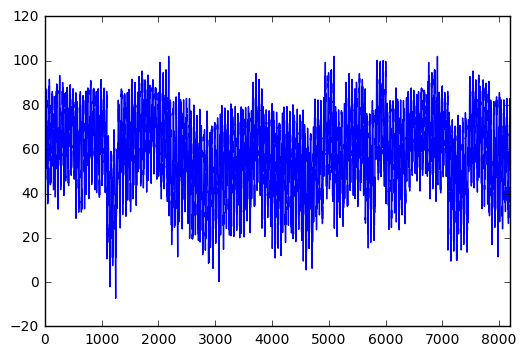

In [15]:
df['Temperature'].plot()

In [16]:
t = df.set_index('Date')

In [17]:
t.index = pd.to_datetime(t.index)

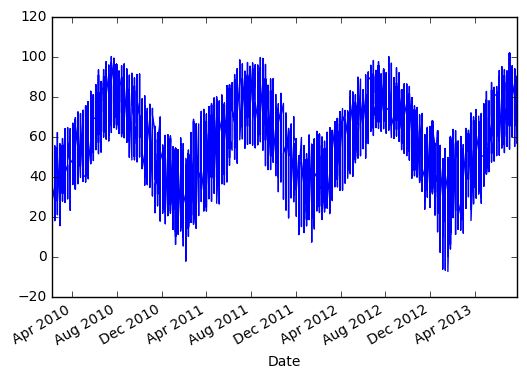

In [18]:
t['Temperature'].plot()

In [19]:
df = df.pivot_table(['Temperature', u'Fuel_Price', u'MarkDown1',
       u'MarkDown2', u'MarkDown3', u'MarkDown4', u'MarkDown5', u'CPI',
       u'Unemployment', u'IsHoliday'], index='Date', columns='Store')

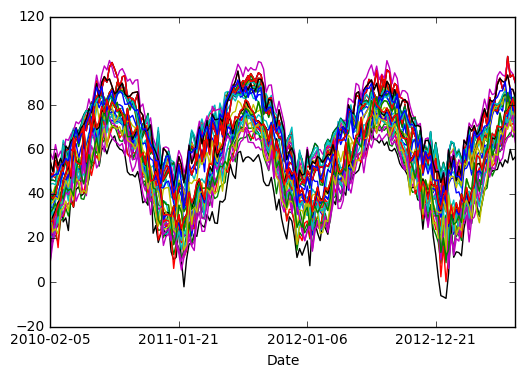

In [20]:
df['Temperature'].plot(legend=False)

In [21]:
df.index = pd.to_datetime(df.index)

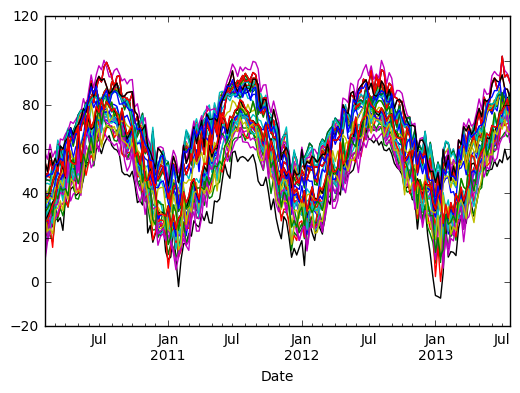

In [22]:
df['Temperature'].plot(legend=False)

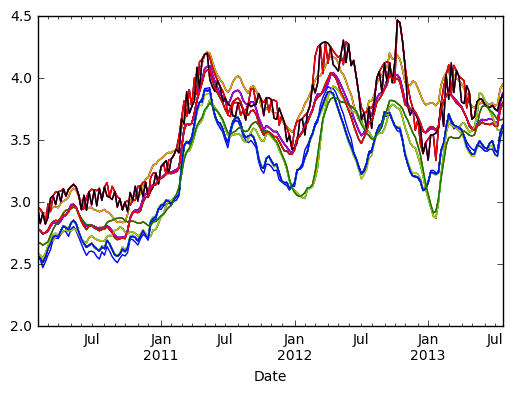

In [23]:
df['Fuel_Price'].plot(legend=False)

# Enter Bokeh

In [132]:
import bokeh
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [142]:
ys = [v for k, v in df['Temperature'].to_dict(orient='list').items()]
xs = [x for i, x in enumerate(df['Temperature'].index)]
xs = [xs for _ in range(0, len(ys))]

p = figure(width=900, height=600)
p.multi_line(xs=xs, ys=ys)

show(p)

In [143]:
from bokeh.models import DatetimeTickFormatter

ys = [v for k, v in df['Temperature'].to_dict(orient='list').items()]
xs = [x for i, x in enumerate(df['Temperature'].index)]
xs = [xs for _ in range(0, len(ys))]

p = figure(width=900, height=600)
p.multi_line(xs=xs, ys=ys)
p.xaxis.formatter=DatetimeTickFormatter(hourmin = ['%H:%M'])

show(p)

In [144]:
ys = [v for k, v in df['Temperature'].to_dict(orient='list').items()]
xs = [x for i, x in enumerate(df['Temperature'].index)]
xs = [xs for _ in range(0, len(ys))]

p1 = figure(width=450, height=400)
p1.multi_line(xs=xs, ys=ys)
p1.xaxis.formatter=DatetimeTickFormatter(hourmin = ['%H:%M'])

ys = [v for k, v in df['Fuel_Price'].to_dict(orient='list').items()]
xs = [x for i, x in enumerate(df['Fuel_Price'].index)]
xs = [xs for _ in range(0, len(ys))]

p2 = figure(width=450, height=400,)
p2.multi_line(xs=xs, ys=ys)
p2.xaxis.formatter=DatetimeTickFormatter(hourmin = ['%H:%M'])

show(Row(p1, p2))

In [145]:
ys = [v for k, v in df['Temperature'].to_dict(orient='list').items()]
xs = [x for i, x in enumerate(df['Temperature'].index)]
xs = [xs for _ in range(0, len(ys))]

p1 = figure(width=450, height=400)
p1.multi_line(xs=xs, ys=ys)
p1.xaxis.formatter=DatetimeTickFormatter(hourmin = ['%H:%M'])

ys = [v for k, v in df['Fuel_Price'].to_dict(orient='list').items()]
xs = [x for i, x in enumerate(df['Fuel_Price'].index)]
xs = [xs for _ in range(0, len(ys))]

p2 = figure(width=450, height=400, x_range=p1.x_range)
p2.multi_line(xs=xs, ys=ys)
p2.xaxis.formatter=DatetimeTickFormatter(hourmin = ['%H:%M'])

show(Row(p1, p2))

In [135]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import DatetimeTickFormatter, Row, ColorMapper
from bokeh.palettes import Viridis256, linear_palette, Category20, Magma256
output_notebook()

Loading BokehJS ...

In [146]:
palette = linear_palette(Magma256, len(df['Temperature'].columns))

ys = [v for k, v in df['Temperature'].to_dict(orient='list').items()]
xs = [x for i, x in enumerate(df['Temperature'].index)]
xs = [xs for _ in range(0, len(ys))]

p1 = figure(width=450, height=400)
p1.multi_line(xs=xs, ys=ys, line_color=palette)
p1.xaxis.formatter=DatetimeTickFormatter(hourmin = ['%H:%M'])

ys = [v for k, v in df['Fuel_Price'].to_dict(orient='list').items()]
xs = [x for i, x in enumerate(df['Fuel_Price'].index)]
xs = [xs for _ in range(0, len(ys))]

p2 = figure(width=450, height=400, x_range=p1.x_range)
p2.multi_line(xs=xs, ys=ys, line_color=palette)
p2.xaxis.formatter=DatetimeTickFormatter(hourmin = ['%H:%M'])

show(Row(p1, p2))